##**Theoretical Questions **##



**1. What is Boosting in Machine Learning**
Boosting is an ensemble technique that combines multiple weak learners sequentially to create a strong learner by correcting the errors of the previous models.

---

**2. How does Boosting differ from Bagging**
Boosting trains models sequentially with each focusing on the previous model's errors, while Bagging trains models in parallel on random subsets to reduce variance.

---

**3. What is the key idea behind AdaBoost**
AdaBoost assigns higher weights to misclassified instances so that subsequent models focus more on hard-to-classify examples.

---

**4. Explain the working of AdaBoost with an example**
AdaBoost trains weak learners sequentially, adjusting sample weights after each round. For example, in binary classification, it increases weights of wrongly predicted samples for the next iteration.

---

**5. What is Gradient Boosting, and how is it different from AdaBoost**
Gradient Boosting minimizes a loss function by fitting new models to the residuals of previous models, while AdaBoost adjusts weights of misclassified samples.

---

**6. What is the loss function in Gradient Boosting**
It depends on the task: typically, mean squared error for regression and log loss for classification.

---

**7. How does XGBoost improve over traditional Gradient Boosting**
XGBoost improves speed and performance through regularization, parallel processing, tree pruning, and handling missing values efficiently.

---

**8. What is the difference between XGBoost and CatBoost**
XGBoost is faster and widely used, while CatBoost is better for categorical data with minimal preprocessing and handles overfitting well.

---

**9. What are some real-world applications of Boosting techniques**
Used in fraud detection, spam filtering, credit scoring, customer churn prediction, and image recognition.

---

**10. How does regularization help in XGBoost**
It prevents overfitting by penalizing complex models using L1 and L2 regularization in the objective function.

---

**11. What are some hyperparameters to tune in Gradient Boosting models**
Key hyperparameters include learning rate, number of estimators, max depth, subsample, and min samples split.

---

**12. What is the concept of Feature Importance in Boosting**
Feature importance measures how valuable each feature is in building the boosted decision trees, often based on split frequency or improvement in loss.

---

**13. Why is CatBoost efficient for categorical data?**
CatBoost uses ordered boosting and automatic encoding techniques that handle categorical features without explicit preprocessing or risk of overfitting.



In [1]:
## Practical Questions##

In [3]:
# 1. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.875


In [4]:
# 2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 46.351530765628524


In [5]:
# 3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Feature Importances:", model.feature_importances_)


Feature Importances: [1.84343069e-06 1.81909765e-02 6.94464329e-04 8.80331065e-04
 2.10854027e-03 1.95924173e-03 4.00351628e-03 4.49633007e-01
 1.77794972e-03 1.24180916e-04 6.81440925e-03 3.75620520e-03
 1.16590630e-03 7.97786471e-03 8.34119228e-04 2.16691258e-03
 1.25150776e-02 2.05226899e-03 1.95737276e-05 4.06291822e-03
 7.55486403e-02 4.94992184e-02 5.10345306e-02 3.81759249e-02
 4.79129041e-03 3.16324947e-04 1.77034742e-02 2.40360222e-01
 1.24091949e-03 5.90147509e-04]


In [6]:
# 4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9261411890075453


In [7]:
# 5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print("XGBoost Accuracy:", xgb_acc)
print("Gradient Boosting Accuracy:", gb_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.94
Gradient Boosting Accuracy: 0.94


In [25]:
# 6. Train a CatBoost Classifier and evaluate using F1-Score
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)
print("F1 Score:", f1_score(y_test, y_pred))


F1 Score: 0.8837209302325582


In [9]:
# 7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1687.965537641741


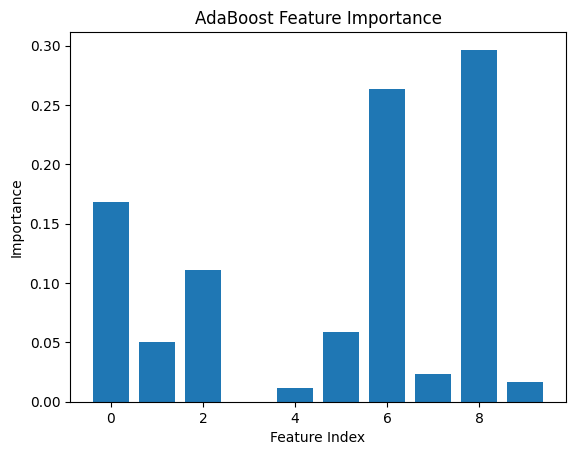

In [10]:
# 8. Train an AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier()
model.fit(X_train, y_train)
plt.bar(range(X.shape[1]), model.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importance")
plt.show()


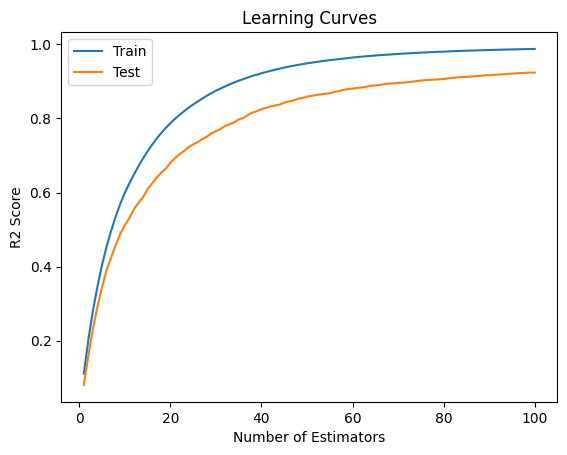

In [11]:
# 9. Train a Gradient Boosting Regressor and plot learning curves
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors = []
test_errors = []

for n in range(1, 101):
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(X_train, y_train)
    train_errors.append(model.score(X_train, y_train))
    test_errors.append(model.score(X_test, y_test))

plt.plot(range(1, 101), train_errors, label="Train")
plt.plot(range(1, 101), test_errors, label="Test")
plt.xlabel("Number of Estimators")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:14:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


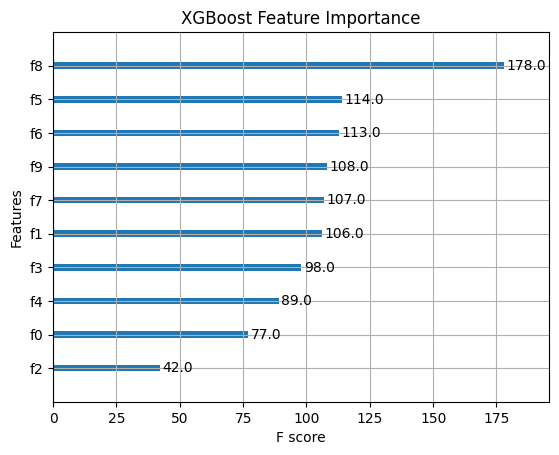

In [12]:
# 10. Train an XGBoost Classifier and visualize feature importance
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


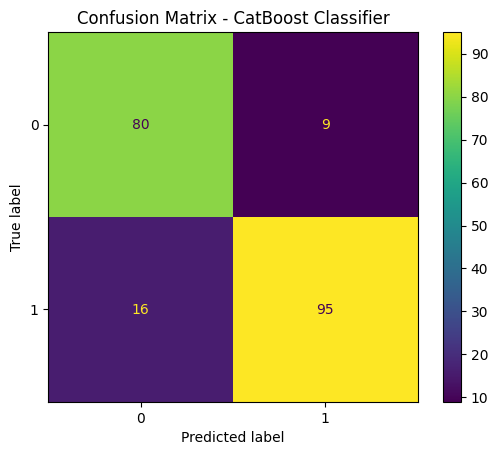

In [24]:
# 11. Train a CatBoost Classifier and plot the confusion matrix
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


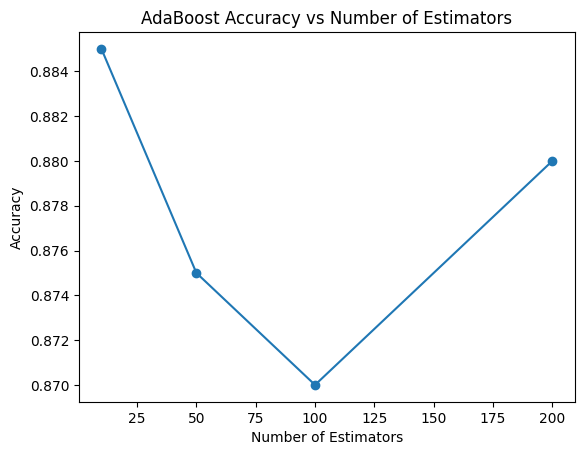

In [14]:
# 12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(estimators, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


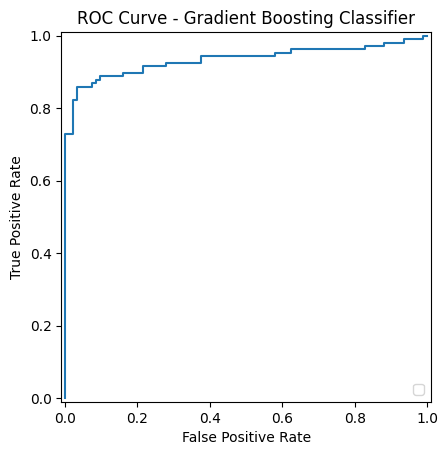

In [15]:
# 13. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.show()


In [16]:
# 14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split

X, y = make_regression(n_samples=1000, n_features=15, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])


Best Learning Rate: 0.2


In [26]:
# 15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_balanced = CatBoostClassifier(class_weights=[1, 10], verbose=0)
model_balanced.fit(X_train, y_train)
y_pred = model_balanced.predict(X_test)
print("F1 Score with Class Weights:", f1_score(y_test, y_pred))

model_default = CatBoostClassifier(verbose=0)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
print("F1 Score without Class Weights:", f1_score(y_test, y_pred_default))


F1 Score with Class Weights: 0.7659574468085106
F1 Score without Class Weights: 0.7317073170731707


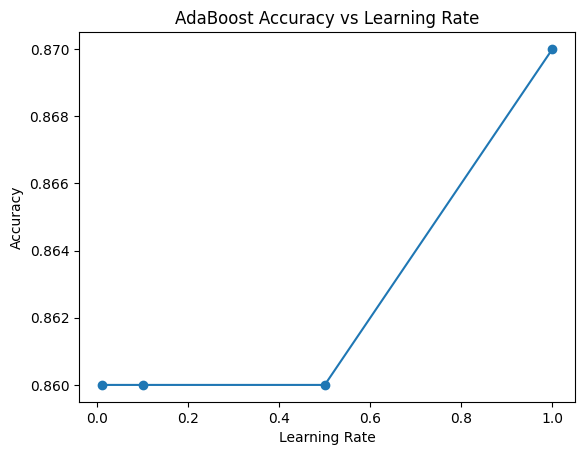

In [18]:
# 16. Train an AdaBoost Classifier and analyze the effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=12, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Learning Rate")
plt.show()


In [19]:
# 17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = make_classification(n_samples=1000, n_features=15, n_classes=3, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.6491465324135501
